In [14]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
os.chdir(os.getcwd()+'/rossmann-store-sales')

In [11]:
train_df = pd.read_csv('train.csv',parse_dates=["Date"])
train_df.head()

C:\env\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [17]:
print(len(train_df))
train_df.dtypes

1017209


Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

In [22]:
train_df.sort_values("Date",inplace=True,ascending=True)
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017208,1115,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017203,1110,2,2013-01-01,0,0,0,0,a,1
1017202,1109,2,2013-01-01,0,0,0,0,a,1


In [40]:
print(len(train_df[train_df['Sales']==0]))
train_df[train_df['Sales']==0].head()

172871


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017208,1115,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017203,1110,2,2013-01-01,0,0,0,0,a,1
1017202,1109,2,2013-01-01,0,0,0,0,a,1


# Sales Distribution

## Sales distribution of 4 randomly selected stores 

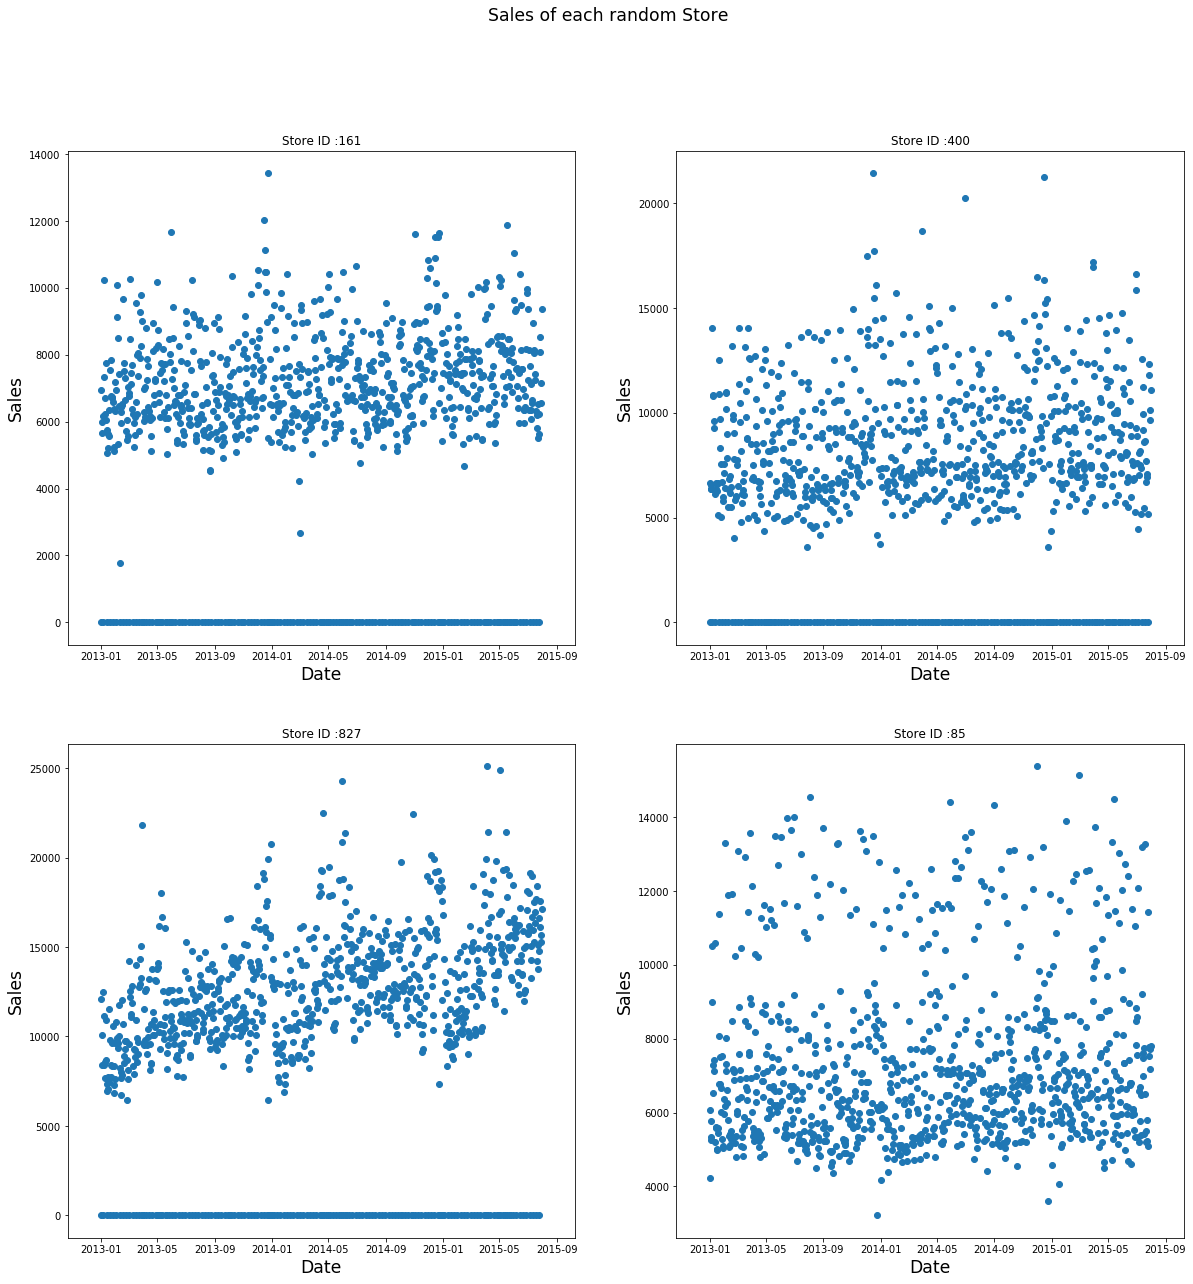

In [53]:
fig, ax = plt.subplots(2, 2,figsize=(20,20))
fig.suptitle('Sales of each random Store', fontsize='xx-large')
for i in range(2):    
    for j in range(2):
        rand_number=np.random.randint(0,1000)
        temp_df = train_df[train_df.Store == rand_number]
        ax[i,j].scatter(temp_df.Date,temp_df.Sales)
        ax[i,j].set_title('Store ID :' + str(rand_number))
        ax[i,j].set_xlabel('Date',fontsize='xx-large');
        ax[i,j].set_ylabel('Sales',fontsize='xx-large');



# Sales Distribution

## Sales distribution of 2 randomly selected stores for promo and no promo 

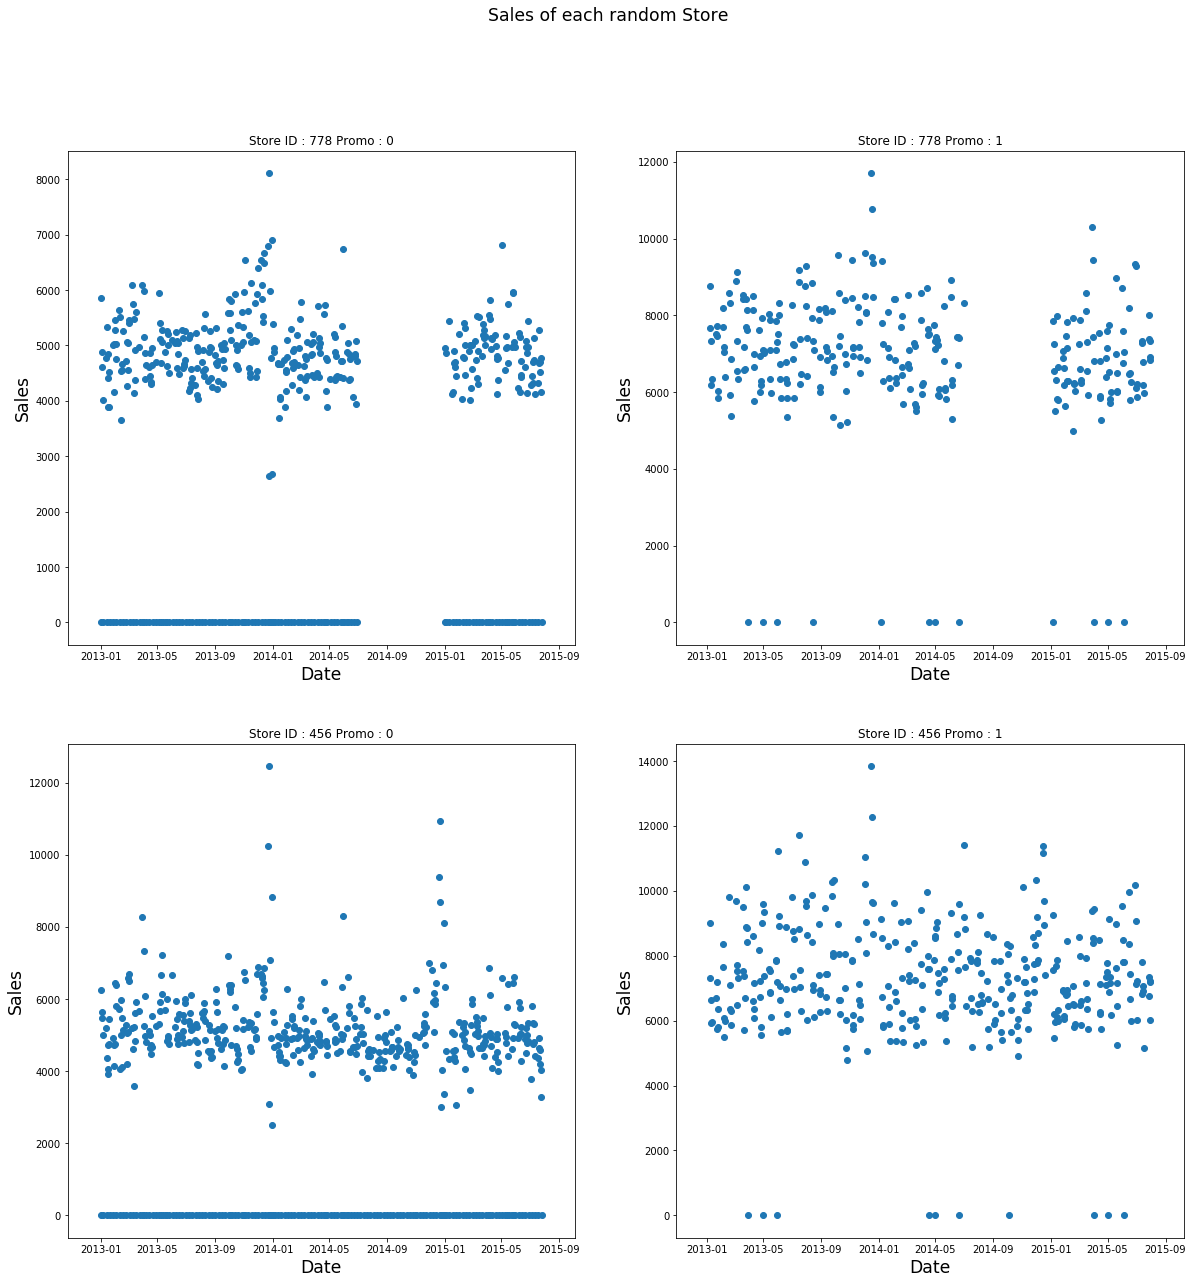

In [84]:
fig, ax = plt.subplots(2, 2,figsize=(20,20))
fig.suptitle('Sales of each random Store', fontsize='xx-large')
for i in range(2):
    rand_number=np.random.randint(0,1000)
    temp2_df = train_df[train_df.Store == rand_number]
    for j in range(2):
        temp_df = temp2_df[temp2_df.Promo == j]
        ax[i,j].scatter(temp_df.Date,temp_df.Sales)
        ax[i,j].set_title('Store ID : ' + str(rand_number) + ' Promo : '+str(j))
        ax[i,j].set_xlabel('Date',fontsize='xx-large');
        ax[i,j].set_ylabel('Sales',fontsize='xx-large');



## Sales distribution of 4 randomly selected stores on a School Holiday

Wall time: 146 ms


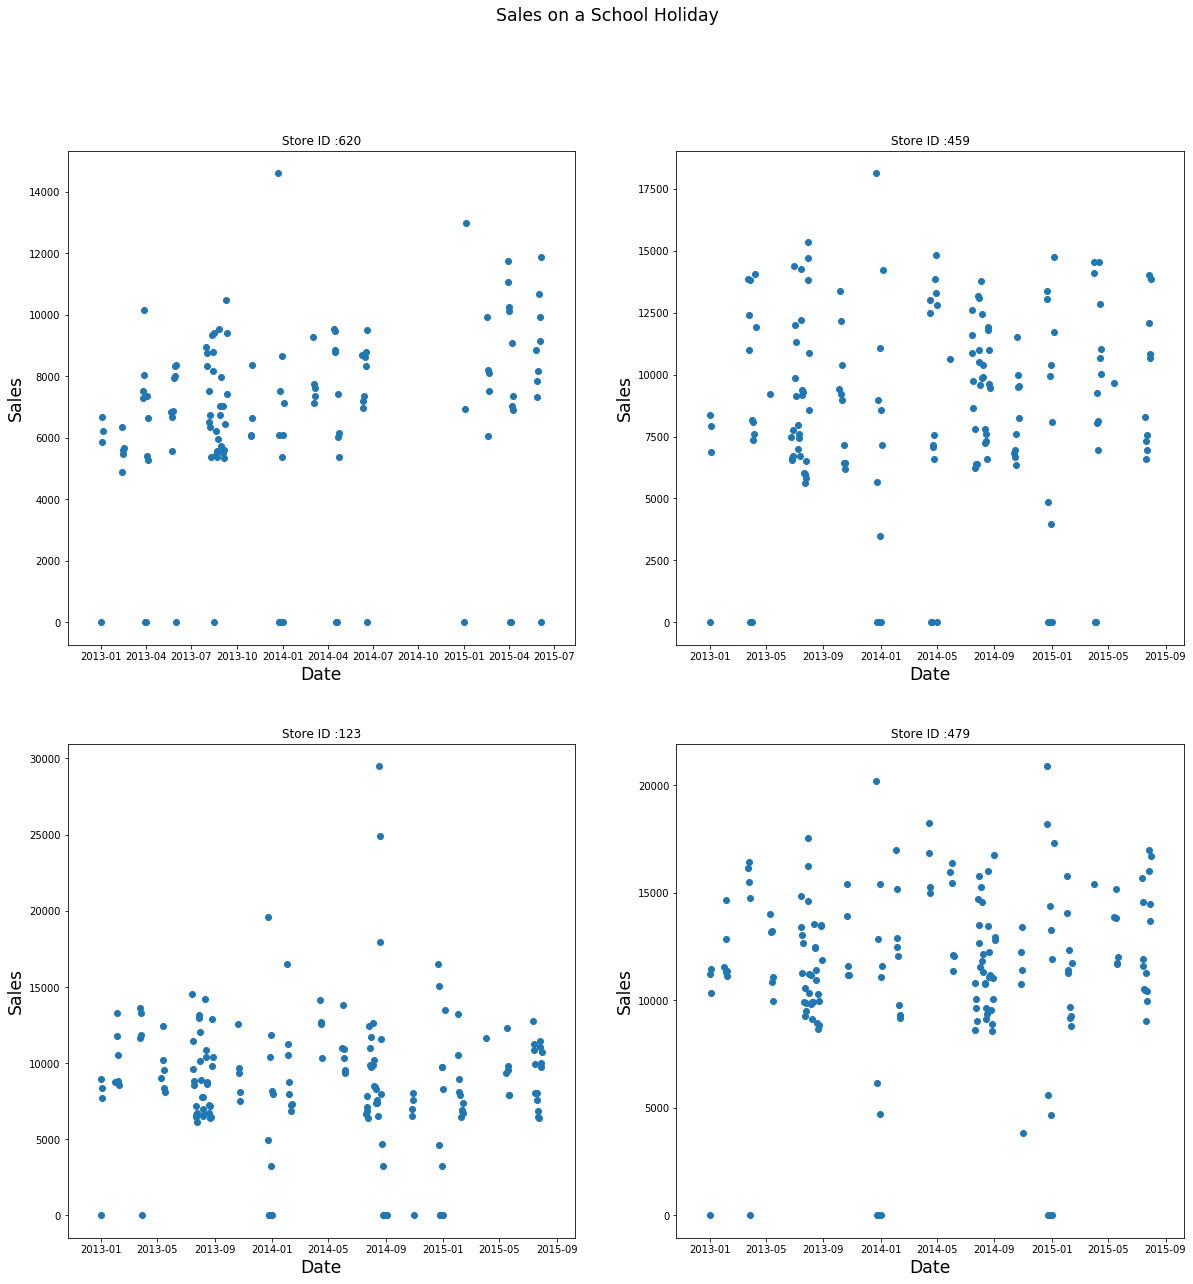

In [58]:
%%time
fig, ax = plt.subplots(2, 2,figsize=(20,20))
fig.suptitle('Sales on a School Holiday', fontsize='xx-large')
for i in range(2):    
    for j in range(2):
        rand_number=np.random.randint(0,1000)
        temp_df = train_df[train_df.Store == rand_number]
        temp_df = temp_df[temp_df['SchoolHoliday'] == 1]
        ax[i,j].scatter(temp_df.Date,temp_df.Sales)
        ax[i,j].set_title('Store ID :' + str(rand_number))
        ax[i,j].set_xlabel('Date',fontsize='xx-large');
        ax[i,j].set_ylabel('Sales',fontsize='xx-large');



## Sales distribution of 4 randomly selected stores on a State Holiday

Wall time: 108 ms


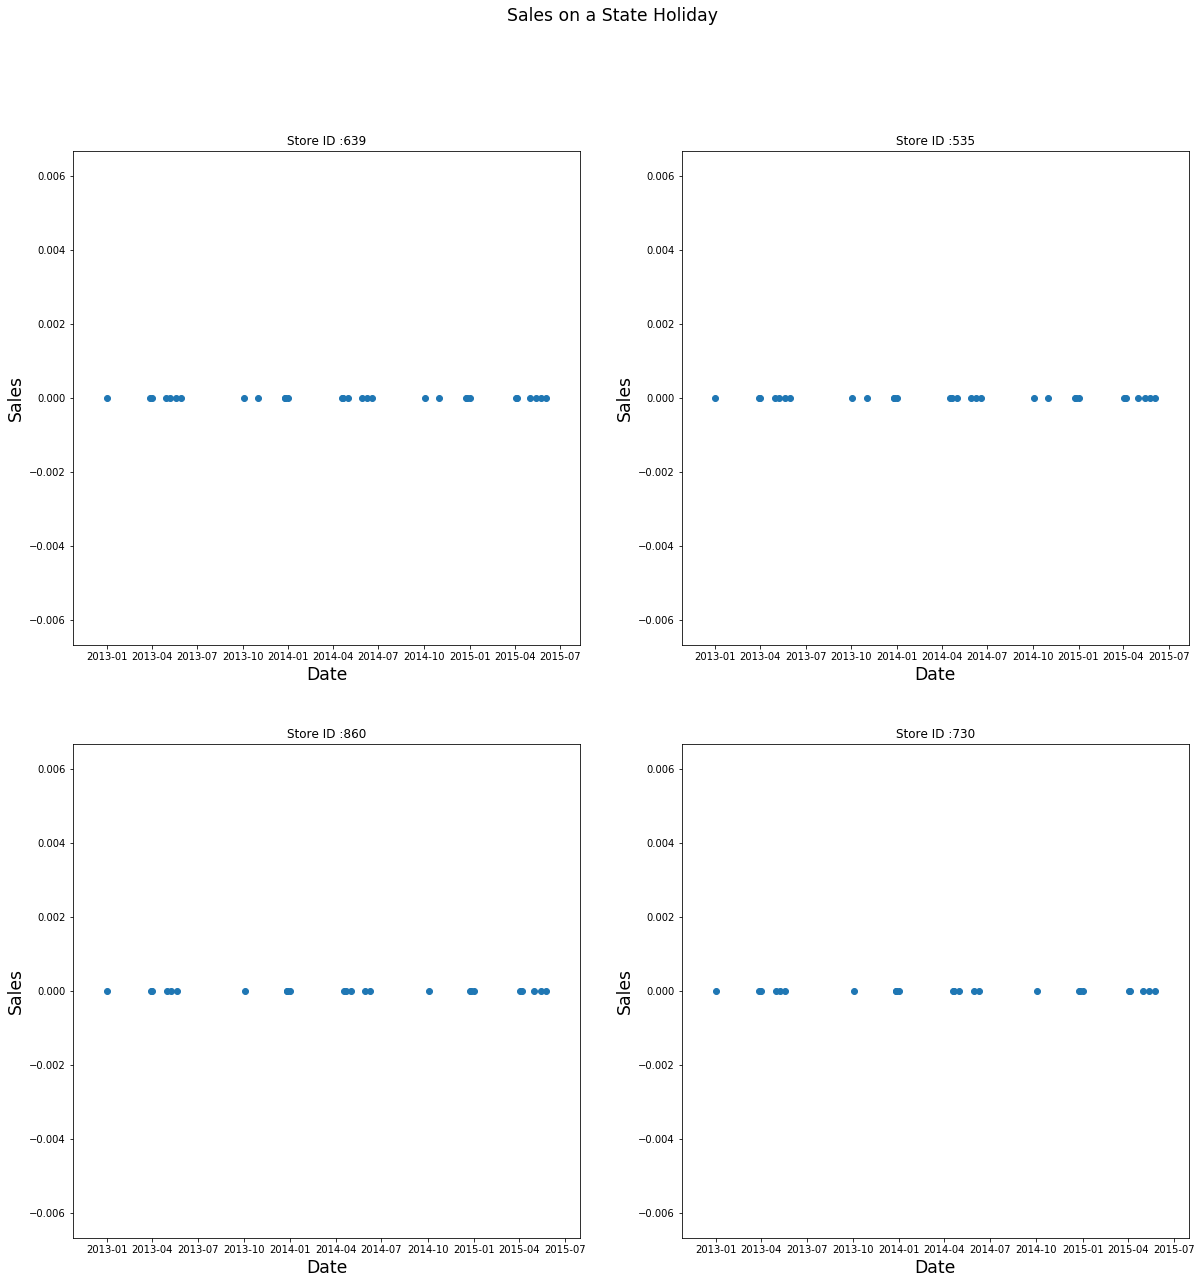

In [75]:
%%time
fig, ax = plt.subplots(2, 2,figsize=(20,20))
fig.suptitle('Sales on a State Holiday', fontsize='xx-large')
for i in range(2):    
    for j in range(2):
        rand_number=np.random.randint(0,1000)
        temp_df = train_df[train_df.Store == rand_number]
        temp_df = temp_df[temp_df['StateHoliday'] != '0']
        temp_df = temp_df[temp_df['StateHoliday'] != 0]
        ax[i,j].scatter(temp_df.Date,temp_df.Sales)
        ax[i,j].set_title('Store ID :' + str(rand_number))
        ax[i,j].set_xlabel('Date',fontsize='xx-large');
        ax[i,j].set_ylabel('Sales',fontsize='xx-large');


##### On a State Holiday there are no sales for alll the stores

## Sales distribution of 4 randomly selected stores on Week days

#### DayofWeek:
1. Monday
2. Tuesday
3. Wednesday
4. Thursday
5. Friday
6. Saturday
7. Sunday

Wall time: 132 ms


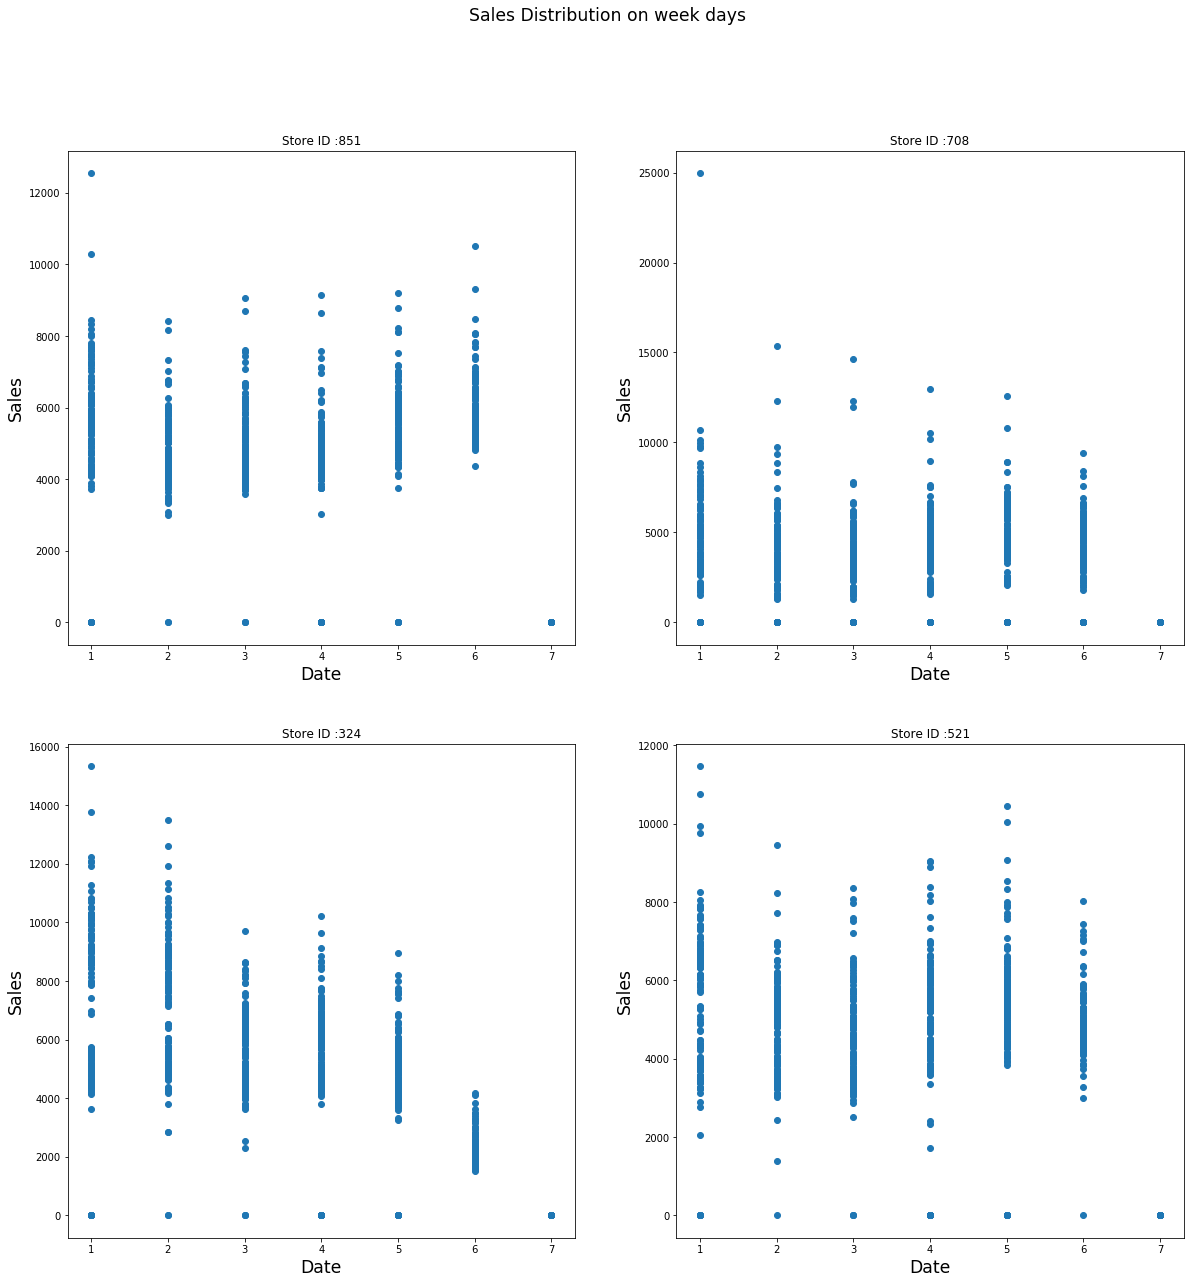

In [91]:
%%time
fig, ax = plt.subplots(2, 2,figsize=(20,20))
fig.suptitle('Sales Distribution on week days', fontsize='xx-large')
for i in range(2):
    for j in range(2):
        rand_number=np.random.randint(0,1000)
        temp_df = train_df[train_df.Store == rand_number]
        ax[i,j].scatter(temp_df.DayOfWeek,temp_df.Sales)
        ax[i,j].set_title('Store ID :' + str(rand_number))
        ax[i,j].set_xlabel('Date',fontsize='xx-large');
        ax[i,j].set_ylabel('Sales',fontsize='xx-large');


In [42]:
df_2=train_df.copy()
df_2["Year"]=train_df.Date.dt.year
df_2["Month"]=train_df.Date.dt.month
df_2["DayofYear"]=train_df.Date.dt.dayofyear
df_2["DayofMonth"]=train_df.Date.dt.day
df_2.drop("Date",axis=1,inplace=True)
df_2.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,DayofYear,DayofMonth
1017208,1115,2,0,0,0,0,a,1,2013,1,1,1
1017205,1112,2,0,0,0,0,a,1,2013,1,1,1
1017204,1111,2,0,0,0,0,a,1,2013,1,1,1
1017203,1110,2,0,0,0,0,a,1,2013,1,1,1
1017202,1109,2,0,0,0,0,a,1,2013,1,1,1


## Sales distribution of 4 randomly selected stores per months

#### DayofWeek:
1. Jan
2. Feb
3. Mar
4. Apr
5. May
6. Jun
7. Jul
8. Aug
9. Sep
10. Oct
11. Nov
12. Dec

Wall time: 157 ms


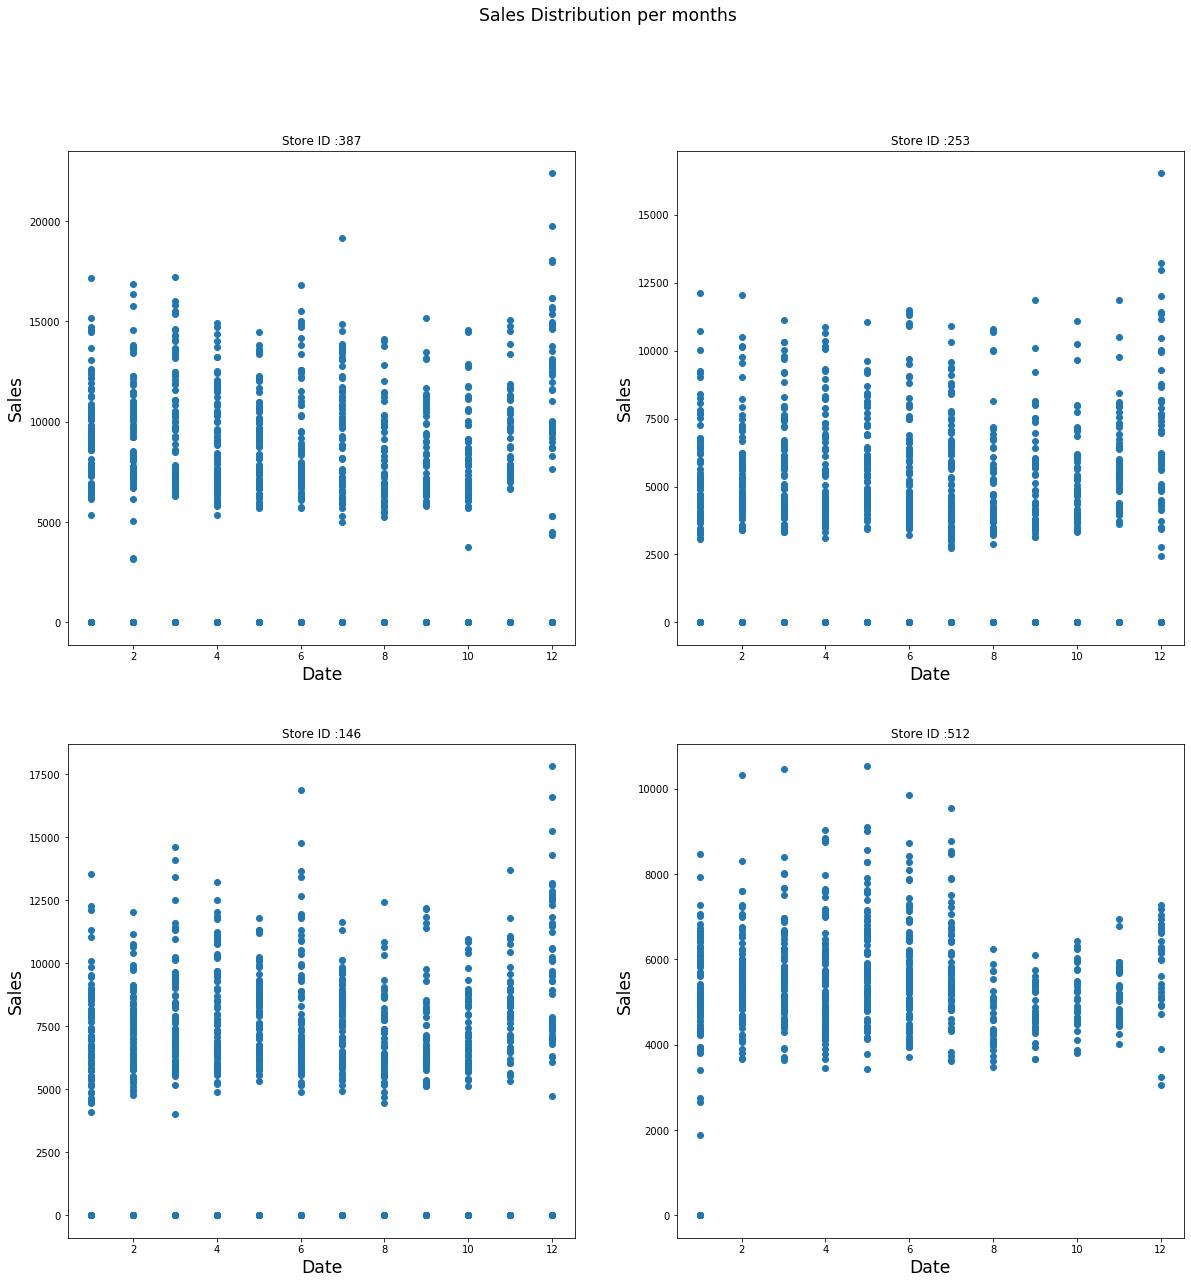

In [60]:
%%time
fig, ax = plt.subplots(2, 2,figsize=(20,20))
fig.suptitle('Sales Distribution per months', fontsize='xx-large')
for i in range(2):
    for j in range(2):
        rand_number=np.random.randint(0,1000)
        temp_df = df_2[df_2.Store == rand_number]
        ax[i,j].scatter(temp_df.Month,temp_df.Sales)
        ax[i,j].set_title('Store ID :' + str(rand_number))
        ax[i,j].set_xlabel('Date',fontsize='xx-large');
        ax[i,j].set_ylabel('Sales',fontsize='xx-large');


# Customers Distribution

## Customer distribution of 4 randomly selected stores 

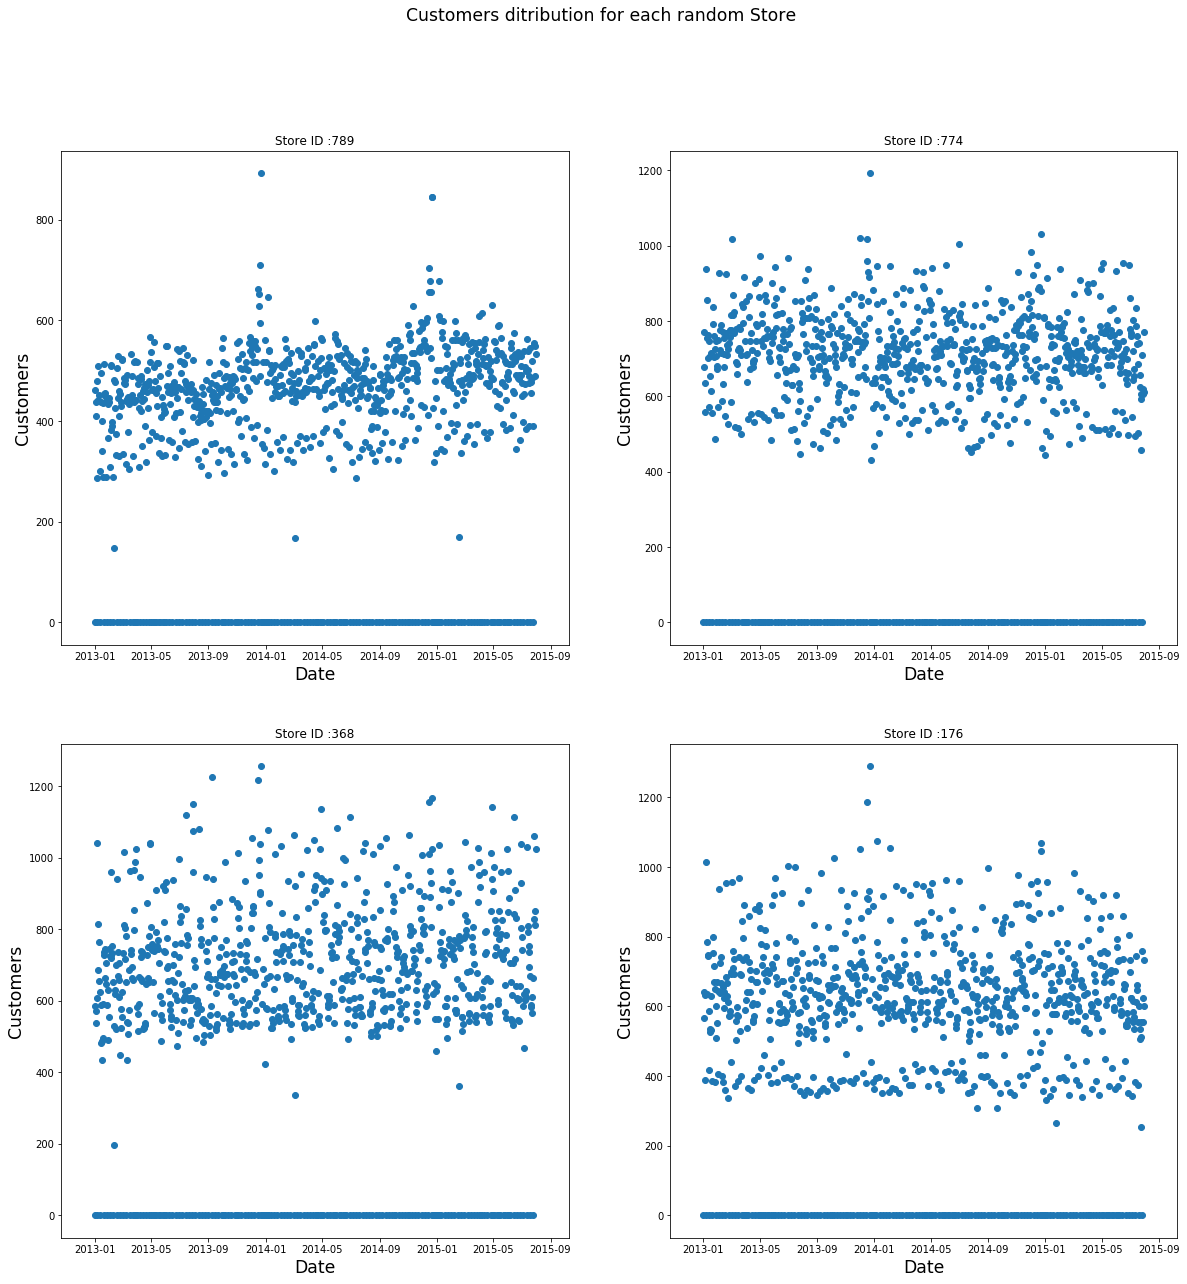

In [62]:
fig, ax = plt.subplots(2, 2,figsize=(20,20))
fig.suptitle('Customers ditribution for each random Store', fontsize='xx-large')
for i in range(2):    
    for j in range(2):
        rand_number=np.random.randint(0,1000)
        temp_df = train_df[train_df.Store == rand_number]
        ax[i,j].scatter(temp_df.Date,temp_df.Customers)
        ax[i,j].set_title('Store ID :' + str(rand_number))
        ax[i,j].set_xlabel('Date',fontsize='xx-large');
        ax[i,j].set_ylabel('Customers',fontsize='xx-large');



## Sales distribution of 4 randomly selected stores on a School Holiday

Wall time: 108 ms


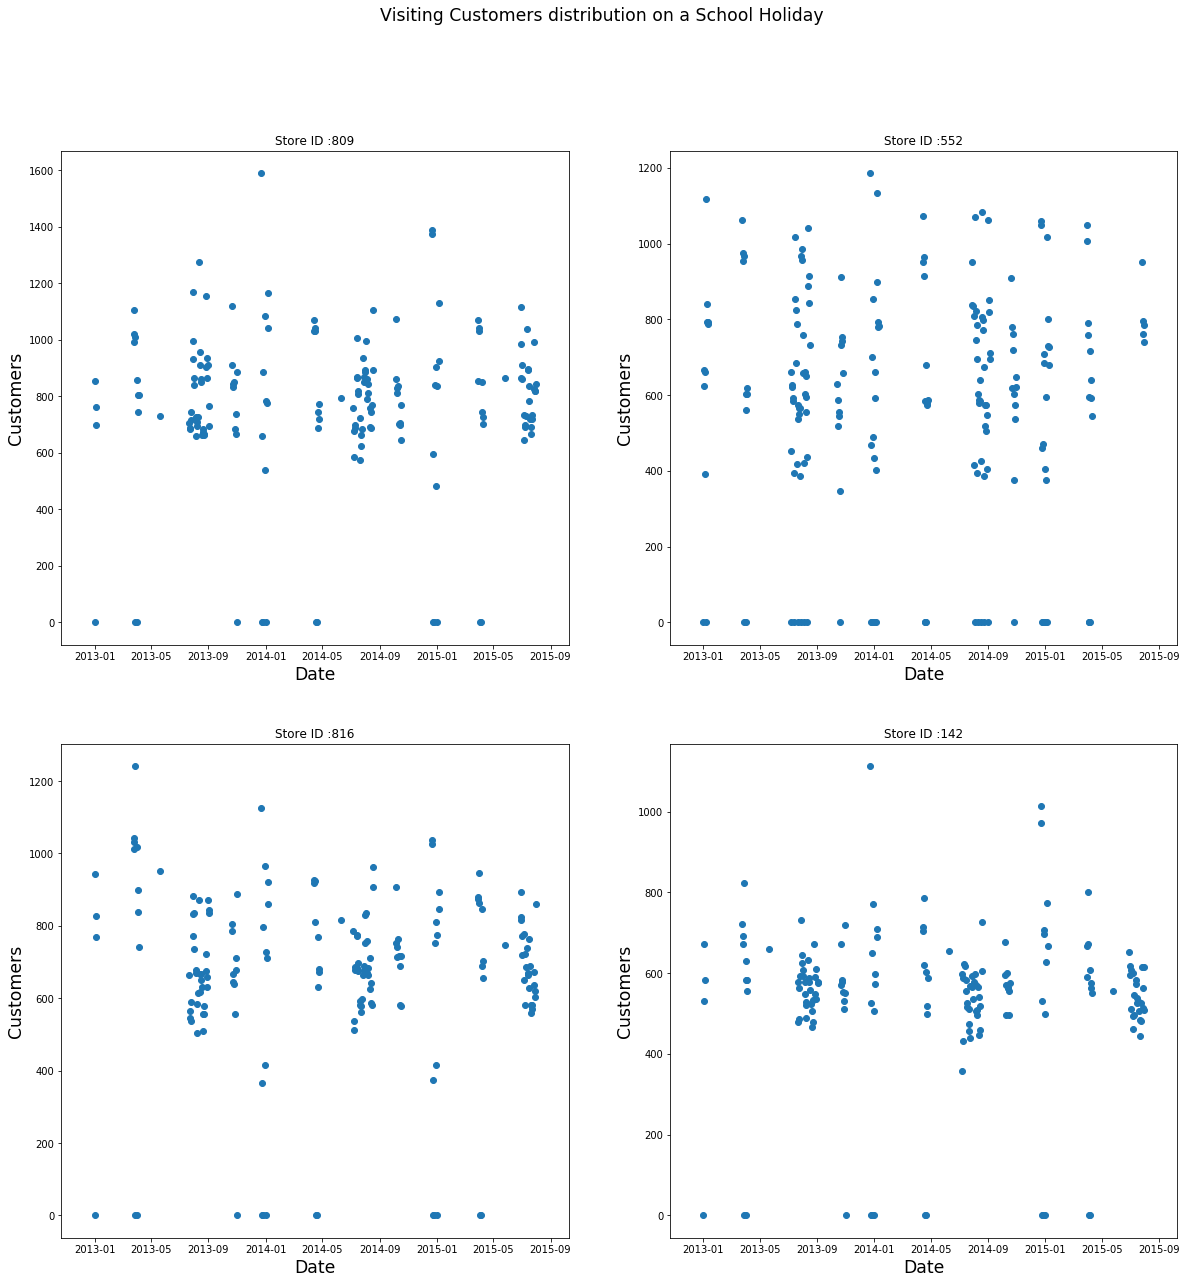

In [63]:
%%time
fig, ax = plt.subplots(2, 2,figsize=(20,20))
fig.suptitle('Visiting Customers distribution on a School Holiday', fontsize='xx-large')
for i in range(2):    
    for j in range(2):
        rand_number=np.random.randint(0,1000)
        temp_df = train_df[train_df.Store == rand_number]
        temp_df = temp_df[temp_df['SchoolHoliday'] == 1]
        ax[i,j].scatter(temp_df.Date,temp_df.Customers)
        ax[i,j].set_title('Store ID :' + str(rand_number))
        ax[i,j].set_xlabel('Date',fontsize='xx-large');
        ax[i,j].set_ylabel('Customers',fontsize='xx-large');



## Customers distribution of 4 randomly selected stores on Week days

#### DayofWeek:
1. Monday
2. Tuesday
3. Wednesday
4. Thursday
5. Friday
6. Saturday
7. Sunday

Wall time: 114 ms


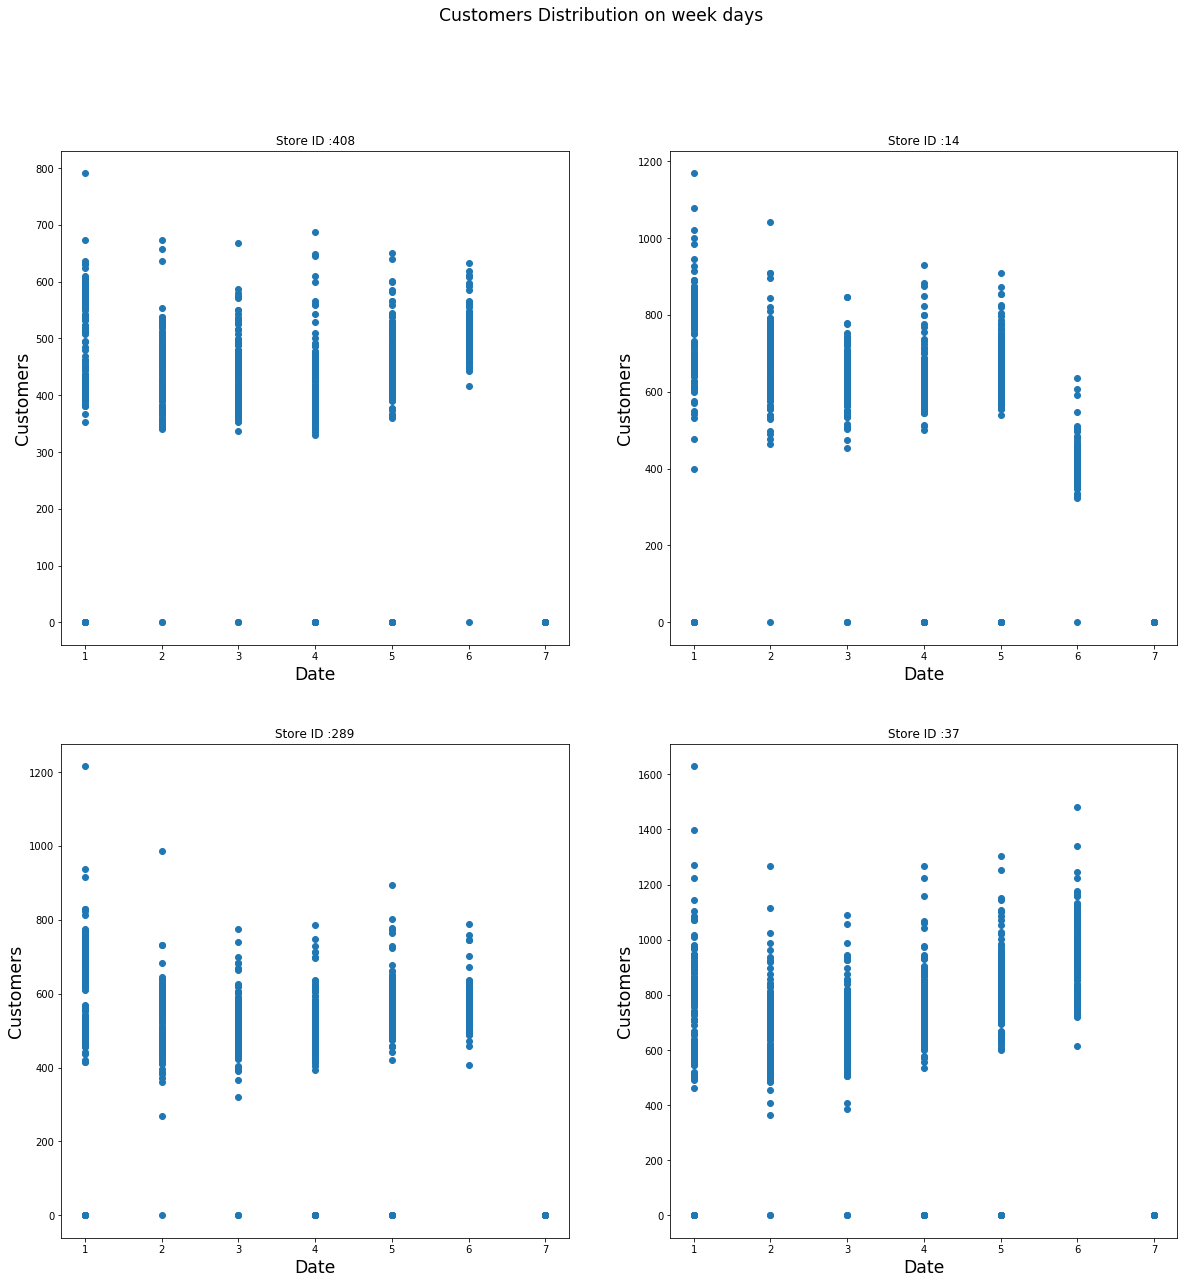

In [64]:
%%time
fig, ax = plt.subplots(2, 2,figsize=(20,20))
fig.suptitle('Customers Distribution on week days', fontsize='xx-large')
for i in range(2):
    for j in range(2):
        rand_number=np.random.randint(0,1000)
        temp_df = train_df[train_df.Store == rand_number]
        ax[i,j].scatter(temp_df.DayOfWeek,temp_df.Customers)
        ax[i,j].set_title('Store ID :' + str(rand_number))
        ax[i,j].set_xlabel('Date',fontsize='xx-large');
        ax[i,j].set_ylabel('Customers',fontsize='xx-large');


## Customers distribution of 4 randomly selected stores per months

#### DayofWeek:
1. Jan
2. Feb
3. Mar
4. Apr
5. May
6. Jun
7. Jul
8. Aug
9. Sep
10. Oct
11. Nov
12. Dec

Wall time: 163 ms


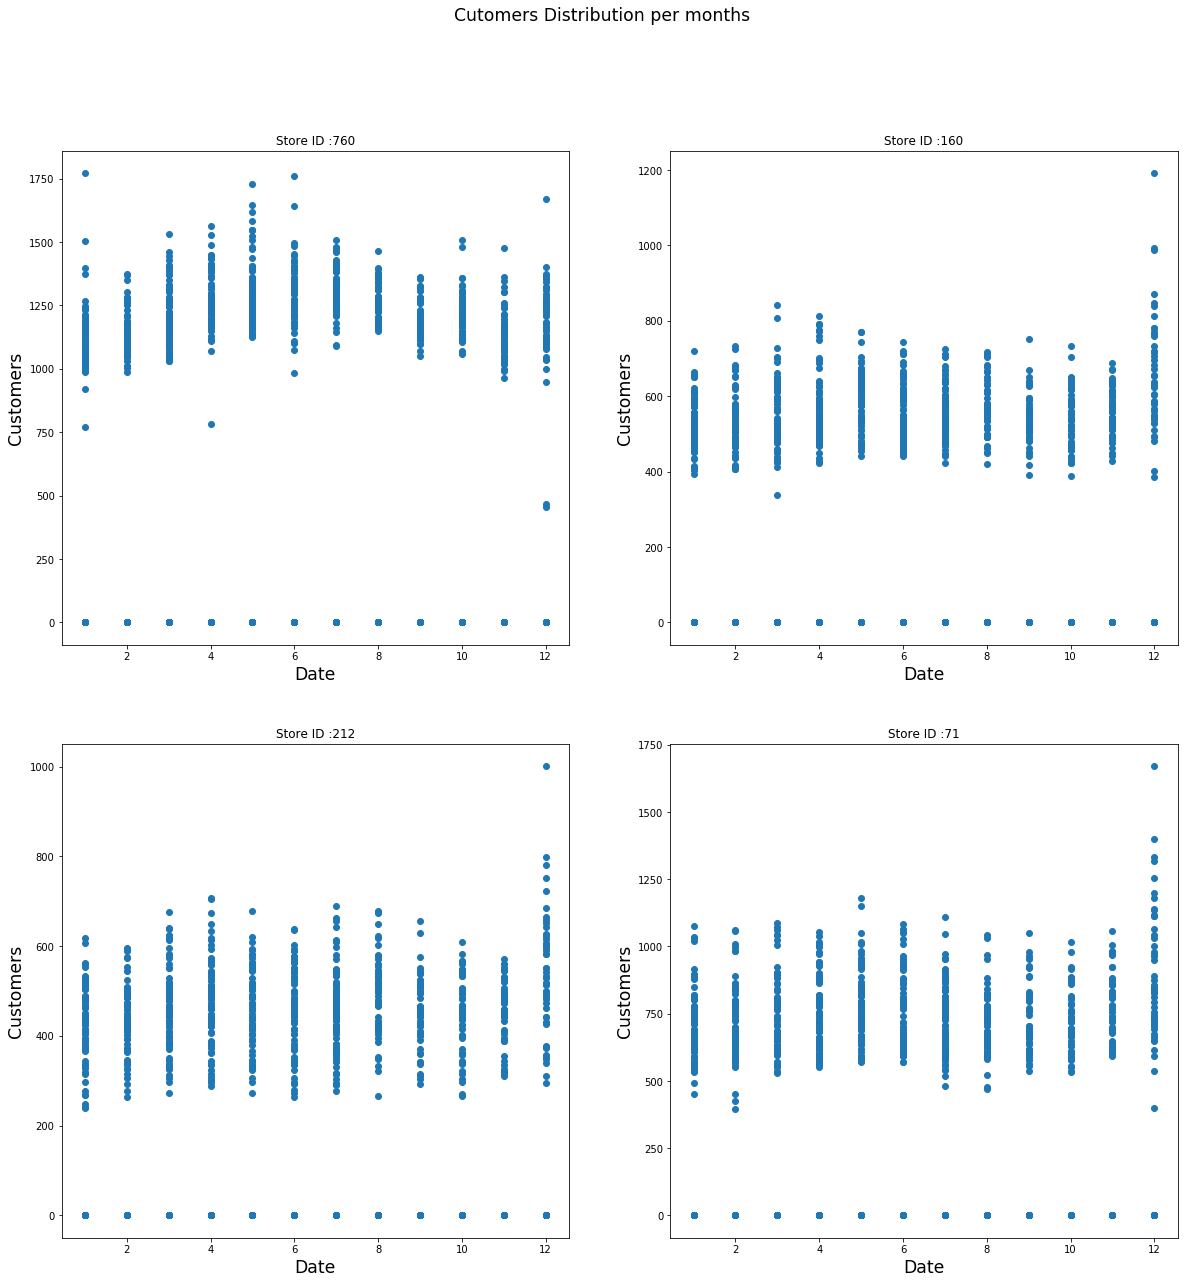

In [65]:
%%time
fig, ax = plt.subplots(2, 2,figsize=(20,20))
fig.suptitle('Cutomers Distribution per months', fontsize='xx-large')
for i in range(2):
    for j in range(2):
        rand_number=np.random.randint(0,1000)
        temp_df = df_2[df_2.Store == rand_number]
        ax[i,j].scatter(temp_df.Month,temp_df.Customers)
        ax[i,j].set_title('Store ID :' + str(rand_number))
        ax[i,j].set_xlabel('Date',fontsize='xx-large');
        ax[i,j].set_ylabel('Customers',fontsize='xx-large');


In [66]:
df_2.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,DayofYear,DayofMonth
1017208,1115,2,0,0,0,0,a,1,2013,1,1,1
1017205,1112,2,0,0,0,0,a,1,2013,1,1,1
1017204,1111,2,0,0,0,0,a,1,2013,1,1,1
1017203,1110,2,0,0,0,0,a,1,2013,1,1,1
1017202,1109,2,0,0,0,0,a,1,2013,1,1,1


In [85]:
final_df1 = train_df[train_df['StateHoliday'] == 0]
final_df2 = train_df[train_df['StateHoliday'] == '0']
final_df_ = pd.concat([final_df1,final_df2],axis = 0)
final_df_.sort_values("Date",inplace=True,ascending=True)

final_df=final_df_.copy()
final_df["Year"]=final_df_.Date.dt.year
final_df["Month"]=final_df_.Date.dt.month
final_df["DayofYear"]=final_df_.Date.dt.dayofyear
final_df["DayofMonth"]=final_df_.Date.dt.day
final_df.drop(['Date','StateHoliday'],axis=1,inplace=True)
final_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,DayofYear,DayofMonth
1016085,1106,3,5099,620,1,0,1,2013,1,2,2
1015349,370,3,5462,524,1,0,1,2013,1,2,2
1015351,372,3,8014,769,1,0,1,2013,1,2,2
1015358,379,3,3389,413,1,0,1,2013,1,2,2
1015353,374,3,6620,854,1,0,1,2013,1,2,2


In [83]:
final_df.Promo.value_counts()

0    608875
1    377284
Name: Promo, dtype: int64

### Summary:
1. On State holiday, the stores are closed, so all the rows with state holiday can be deleted and the state holiday column can be deleted.
2. Sales are higher when on the day with Promos.
3. Sales are higher in the month of december.